In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
dat = yf.Ticker("BTC-USD")

In [7]:
data = yf.download(tickers=['BTC-USD'], start = "2024-01-01", end = "2024-11-25", interval='1h')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,,
2024-01-01 00:00:00+00:00,42477.253906,42477.253906,42517.601562,42277.726562,42280.234375,0
2024-01-01 01:00:00+00:00,42622.898438,42622.898438,42718.710938,42433.785156,42471.402344,200035328
2024-01-01 02:00:00+00:00,42576.601562,42576.601562,42611.335938,42506.359375,42611.335938,0
2024-01-01 03:00:00+00:00,42320.730469,42320.730469,42581.007812,42270.757812,42575.968750,118417408
2024-01-01 04:00:00+00:00,42387.164062,42387.164062,42387.164062,42227.984375,42325.042969,34720768


In [8]:
data = data.droplevel(level=[1], axis = 1)



In [60]:
data['Current_Average'] = 0.0
for index in range(data.shape[0]):
    if index < 10:
        data.iloc[index,data.columns.get_loc('Current_Average')] = data[:(index+1)]['Close'].sum()/(index+1)
    else:
        data.iloc[index,data.columns.get_loc('Current_Average')] = data[(index-10):index]['Close'].sum()/10

In [61]:
data

Price,Adj Close,Close,High,Low,Open,Volume,Current_Average
Datetime,,,,,,,
2024-01-01 00:00:00+00:00,42477.253906,42477.253906,42517.601562,42277.726562,42280.234375,0,42477.253906
2024-01-01 01:00:00+00:00,42622.898438,42622.898438,42718.710938,42433.785156,42471.402344,200035328,42550.076172
2024-01-01 02:00:00+00:00,42576.601562,42576.601562,42611.335938,42506.359375,42611.335938,0,42558.917969
2024-01-01 03:00:00+00:00,42320.730469,42320.730469,42581.007812,42270.757812,42575.968750,118417408,42499.371094
2024-01-01 04:00:00+00:00,42387.164062,42387.164062,42387.164062,42227.984375,42325.042969,34720768,42476.929688
...,...,...,...,...,...,...,...
2024-11-24 19:00:00+00:00,96392.078125,96392.078125,96590.414062,96200.406250,96590.414062,247943168,96951.110937
2024-11-24 20:00:00+00:00,96827.968750,96827.968750,96867.820312,96258.117188,96359.125000,0,96785.101562
2024-11-24 21:00:00+00:00,97034.539062,97034.539062,97034.539062,96662.437500,96867.351562,111915008,96685.814062


In [62]:
training_data = data[['Close', 'Current_Average']]
training_close = np.array(training_data['Close']["2024-1-1":"2024-9-30"])
training_avg = np.array(training_data['Current_Average']["2024-1-1":"2024-9-30"])
training_avg = training_avg.reshape(-1,1)

In [63]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(training_avg, training_close)


In [64]:
test_avg = (np.array(training_data['Current_Average']["2024-10-1":"2024-11-25"])).reshape(-1,1)
test_close = np.array(training_data['Close']["2024-10-1":"2024-11-25"])
prediction = regr.predict(test_avg)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_close, prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_close, prediction))

Coefficients: 
 [0.99664333]
Mean squared error: 571209.08
Coefficient of determination: 1.00


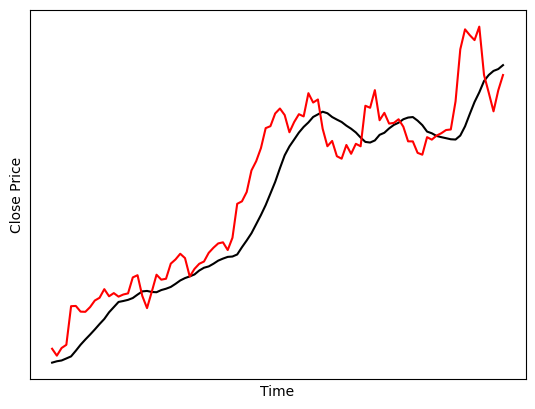

In [84]:
plt.plot(data['Current_Average']["2024-11-10":"2024-11-13"], color="black")
plt.plot(data['Close']["2024-11-10":"2024-11-13"],color = 'red')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.xticks(())
plt.yticks(())

plt.show()